In [1]:
import time
import numpy as np
from numpy import zeros, diag, eye
from numpy.linalg import solve
from numpy.random import uniform
from scipy.stats import multivariate_normal
from tangential_hug_functions import Hug, Hop, HugTangential
from utils import quick_MVN_scatter, ESS, quick_MVN_marginals_kdes, box_plot
import matplotlib.pyplot as plt

In [2]:
# HUG
ESS_hug = np.load("largehessian/ESS_HUG.npy")
ESS_logpi_hug = np.load("largehessian/ESS_LOGPI_HUG.npy")
ESS_comp1_hug = np.load("largehessian/ESS_COMP1_HUG.npy")
ESS_comp2_hug = np.load("largehessian/ESS_COMP2_HUG.npy")
AHUG = np.load("largehessian/AHUG.npy")

ATHUG = np.load("largehessian/ATHUG.npy")
ESS_thug = np.load("largehessian/ESS_THUG.npy")
ESS_logpi_thug = np.load("largehessian/ESS_LOGPI_THUG.npy")
ESS_comp1_thug = np.load("largehessian/ESS_COMP1_THUG.npy")
ESS_comp2_thug = np.load("largehessian/ESS_COMP2_THUG.npy")

ESS_MIN_HUG  = np.stack((ESS_comp1_hug, ESS_comp2_hug)).min(axis=0) 
ESS_MIN_THUG = np.stack((ESS_comp1_thug, ESS_comp2_thug)).min(axis=0)

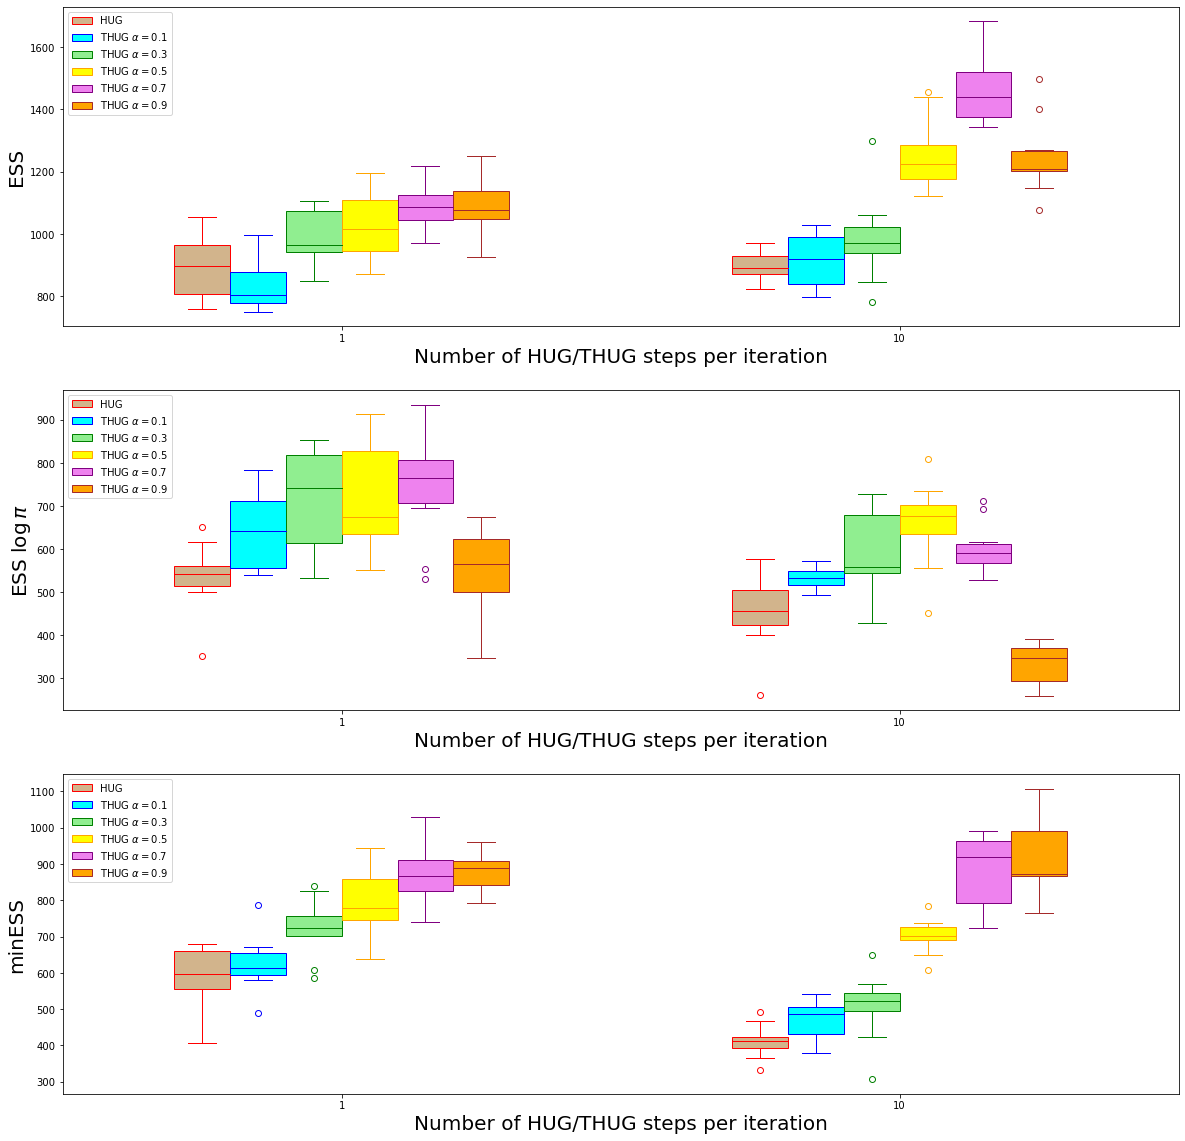

In [3]:
columns = [1, 10]
width = 0.2
n_alphas = ESS_thug.shape[2]
ticks = np.array([1, 3])
n_boxes = n_alphas + 1
disp = np.linspace(-width * (n_boxes-1) / 2, width * (n_boxes-1) / 2, n_boxes, endpoint=True)
positions = disp.reshape(-1, 1) + ticks

fig, ax = plt.subplots(nrows=3, figsize=(20, 20))
# multiESS
bp1 = box_plot(ax[0], ESS_hug.T.tolist(), 'red', 'tan', positions[0])
bp2 = box_plot(ax[0], ESS_thug[:,:,0].T.tolist(), 'blue', 'cyan', positions[1])
bp3 = box_plot(ax[0], ESS_thug[:,:,1].T.tolist(), 'green', 'lightgreen', positions[2])
bp4 = box_plot(ax[0], ESS_thug[:,:,2].T.tolist(), 'orange', 'yellow', positions[3])
bp5 = box_plot(ax[0], ESS_thug[:,:,3].T.tolist(), 'purple', 'violet', positions[4])
bp6 = box_plot(ax[0], ESS_thug[:,:,4].T.tolist(), 'brown', 'orange', positions[5])
ax[0].legend(
    [bp1["boxes"][0], bp2["boxes"][0], bp3['boxes'][0], bp4['boxes'][0], bp5['boxes'][0], bp6['boxes'][0]], 
    ['HUG', 'THUG $\\alpha=0.1$', 'THUG $\\alpha=0.3$','THUG $\\alpha=0.5$', 'THUG $\\alpha=0.7$','THUG $\\alpha=0.9$'], 
    loc='upper left')
ax[0].set_xticks(ticks)
ax[0].set_xticklabels(columns)
ax[0].set_xlabel("Number of HUG/THUG steps per iteration", fontsize=20)
ax[0].set_ylabel("ESS", fontsize=20)
# ESS logpi
bp1_logpi = box_plot(ax[1], ESS_logpi_hug.T.tolist(), 'red', 'tan', positions[0])
bp2_logpi = box_plot(ax[1], ESS_logpi_thug[:,:,0].T.tolist(), 'blue', 'cyan', positions[1])
bp3_logpi = box_plot(ax[1], ESS_logpi_thug[:,:,1].T.tolist(), 'green', 'lightgreen', positions[2])
bp4_logpi = box_plot(ax[1], ESS_logpi_thug[:,:,2].T.tolist(), 'orange', 'yellow', positions[3])
bp5_logpi = box_plot(ax[1], ESS_logpi_thug[:,:,3].T.tolist(), 'purple', 'violet', positions[4])
bp6_logpi = box_plot(ax[1], ESS_logpi_thug[:,:,4].T.tolist(), 'brown', 'orange', positions[5])
ax[1].legend(
    [bp1_logpi["boxes"][0], bp2_logpi["boxes"][0], bp3_logpi['boxes'][0], bp4_logpi['boxes'][0], bp5_logpi['boxes'][0], bp6_logpi['boxes'][0]], 
    ['HUG', 'THUG $\\alpha=0.1$', 'THUG $\\alpha=0.3$' ,'THUG $\\alpha=0.5$', 'THUG $\\alpha=0.7$', 'THUG $\\alpha=0.9$'], 
    loc='upper left')
ax[1].set_xticks(ticks)
ax[1].set_xticklabels(columns)
ax[1].set_xlabel("Number of HUG/THUG steps per iteration", fontsize=20)
ax[1].set_ylabel("ESS $\\log\\pi$", fontsize=20)
# minESS
bp1_min = box_plot(ax[2], ESS_MIN_HUG.T.tolist(), 'red', 'tan', positions[0])
bp2_min = box_plot(ax[2], ESS_MIN_THUG[:,:,0].T.tolist(), 'blue', 'cyan', positions[1])
bp3_min = box_plot(ax[2], ESS_MIN_THUG[:,:,1].T.tolist(), 'green', 'lightgreen', positions[2])
bp4_min = box_plot(ax[2], ESS_MIN_THUG[:,:,2].T.tolist(), 'orange', 'yellow', positions[3])
bp5_min = box_plot(ax[2], ESS_MIN_THUG[:,:,3].T.tolist(), 'purple', 'violet', positions[4])
bp6_min = box_plot(ax[2], ESS_MIN_THUG[:,:,4].T.tolist(), 'brown', 'orange', positions[5])
ax[2].legend(
    [bp1_min["boxes"][0], bp2_min["boxes"][0], bp3_min['boxes'][0], bp4_min['boxes'][0], bp5_min['boxes'][0], bp6_min['boxes'][0]], 
    ['HUG', 'THUG $\\alpha=0.1$', 'THUG $\\alpha=0.3$','THUG $\\alpha=0.5$', 'THUG $\\alpha=0.7$', 'THUG $\\alpha=0.9$'], 
    loc='upper left')
ax[2].set_xticks(ticks)
ax[2].set_xticklabels(columns)
ax[2].set_xlabel("Number of HUG/THUG steps per iteration", fontsize=20)
ax[2].set_ylabel("minESS", fontsize=20)
plt.show()

In [4]:
print("HUG        N=1:  {:.2%}".format(AHUG[0]))
print("HUG       N=10:  {:.2%}".format(AHUG[1]))
print("-"*25)
print("THUG a=0.1 N=1:  {:.2%}".format(ATHUG[0, 0]))
print("THUG a=0.3 N=1:  {:.2%}".format(ATHUG[0, 1]))
print("THUG a=0.5 N=1:  {:.2%}".format(ATHUG[0, 2]))
print("THUG a=0.7 N=1:  {:.2%}".format(ATHUG[0, 3]))
print("THUG a=0.9 N=1:  {:.2%}".format(ATHUG[0, 4]))
print("-"*25)
print("THUG a=0.1 N=10: {:.2%}".format(ATHUG[1, 0]))
print("THUG a=0.3 N=10: {:.2%}".format(ATHUG[1, 1]))
print("THUG a=0.5 N=10: {:.2%}".format(ATHUG[1, 2]))
print("THUG a=0.7 N=10: {:.2%}".format(ATHUG[1, 3]))
print("THUG a=0.9 N=10: {:.2%}".format(ATHUG[1, 4]))

HUG        N=1:  23.15%
HUG       N=10:  23.19%
-------------------------
THUG a=0.1 N=1:  24.40%
THUG a=0.3 N=1:  27.30%
THUG a=0.5 N=1:  29.24%
THUG a=0.7 N=1:  32.08%
THUG a=0.9 N=1:  26.46%
-------------------------
THUG a=0.1 N=10: 24.52%
THUG a=0.3 N=10: 26.28%
THUG a=0.5 N=10: 29.37%
THUG a=0.7 N=10: 31.95%
THUG a=0.9 N=10: 26.45%
